### Data Pre-processing

Firstly, install libraries:
pandas, matplotlib, numpy, scipy, scikit-learn, jupyterlab, seaborn, plotly, tensorflow, keras

In [ ]:
pip install -r requirements.txt

In [1]:
import pandas as pd

csv_file = "features.csv"     # CSV of the features extracted file

# Read CSV
df = pd.read_csv(csv_file)
df.head(5)

,id,type,taxi_time,gate (block) hour,runway hour,rwy_day,distance,angle,angle error,shortest path,...,operation_mode,other_moving_ac,QDepDep,QDepArr,QArrDep,QArrArr,NDepDep,NDepArr,NArrDep,NArrArr
0,01-Aug-2021_EZY28TA,arrival,7.116667,23,23,31,1209.120799,369.163842,0,1029.622192,...,0,1,0,0,0,0,0,0,0,0
1,02-Aug-2021_EZY28TA,arrival,0.583333,22,22,2,408.809244,146.955823,0,64.253358,...,0,3,0,0,1,1,0,0,1,2
2,04-Aug-2021_EZY28TA,arrival,3.700000,22,22,4,1839.191193,425.834773,0,1424.002925,...,0,2,0,0,0,0,0,0,0,2
3,06-Aug-2021_EZY28TA,arrival,2.516667,23,23,5,773.289352,192.872935,0,435.692492,...,0,0,0,0,0,0,0,0,0,0
4,05-Aug-2021_EZY28TA,arrival,0.900000,22,22,5,548.248437,223.230689,0,167.657243,...,0,0,0,0,0,0,0,0,0,0


Firstly Ill turn "type" into numerical data entries. For this Arrival = 0 and Departure = 1

In [2]:
df["type"] = df["type"].map({"arrival": 0, "departure": 1})
df.head(5)

,id,type,taxi_time,gate (block) hour,runway hour,rwy_day,distance,angle,angle error,shortest path,...,operation_mode,other_moving_ac,QDepDep,QDepArr,QArrDep,QArrArr,NDepDep,NDepArr,NArrDep,NArrArr
0,01-Aug-2021_EZY28TA,0,7.116667,23,23,31,1209.120799,369.163842,0,1029.622192,...,0,1,0,0,0,0,0,0,0,0
1,02-Aug-2021_EZY28TA,0,0.583333,22,22,2,408.809244,146.955823,0,64.253358,...,0,3,0,0,1,1,0,0,1,2
2,04-Aug-2021_EZY28TA,0,3.700000,22,22,4,1839.191193,425.834773,0,1424.002925,...,0,2,0,0,0,0,0,0,0,2
3,06-Aug-2021_EZY28TA,0,2.516667,23,23,5,773.289352,192.872935,0,435.692492,...,0,0,0,0,0,0,0,0,0,0
4,05-Aug-2021_EZY28TA,0,0.900000,22,22,5,548.248437,223.230689,0,167.657243,...,0,0,0,0,0,0,0,0,0,0


Removing Features - ID and RWY as they arent useful information and they are non-numerical. They are identifiers and not physical data so having unnecessary data to compile into principle components would cause overfitting

In [3]:
df = df.drop(columns=["id"])
df = df.drop(columns=["rwy"])
df.head(5)

,type,taxi_time,gate (block) hour,runway hour,rwy_day,distance,angle,angle error,shortest path,distance_gate,...,operation_mode,other_moving_ac,QDepDep,QDepArr,QArrDep,QArrArr,NDepDep,NDepArr,NArrDep,NArrArr
0,0,7.116667,23,23,31,1209.120799,369.163842,0,1029.622192,83.432228,...,0,1,0,0,0,0,0,0,0,0
1,0,0.583333,22,22,2,408.809244,146.955823,0,64.253358,0.000000,...,0,3,0,0,1,1,0,0,1,2
2,0,3.700000,22,22,4,1839.191193,425.834773,0,1424.002925,88.909014,...,0,2,0,0,0,0,0,0,0,2
3,0,2.516667,23,23,5,773.289352,192.872935,0,435.692492,83.091828,...,0,0,0,0,0,0,0,0,0,0
4,0,0.900000,22,22,5,548.248437,223.230689,0,167.657243,0.000000,...,0,0,0,0,0,0,0,0,0,0


PCA is sensitive to extreme values so Outliers need to be removed. This will be done using the IQR*1.5 method

In [4]:
#Defining continous features
continuous_features = ["taxi_time", "distance", "angle", "angle error","shortest path", "distance_gate", "distance_long", "distance_else"]
#Creating a loop that goes through each feature one by one
for features in df.columns:
    if features in continuous_features: 
        Q1 = df[features].quantile(0.25) # Calculates the 25th percentile value
        Q3 = df[features].quantile(0.75) # Calculates the 75th percentile value
        IQR = Q3 - Q1                         
        lower_bound_outlier = Q1 - (1.5 * IQR)                
        upper_bound_outlier = Q3 + (1.5 * IQR)                
        #Eliminating values outside of the 1.5*IQR range
        df = df[(df[features] >= lower_bound_outlier) & (df[features] <= upper_bound_outlier)]
    else:
        continue

#Checking amount of rows in data after outlier removal
Current_rows2 = len(df)
print(Current_rows2)

6755


It is extremely important that the IQR outlier removal ONLY affects clear outliers. Not features like QArrArr which represents the number of aircraft on standby as this value is 0 most of the time but during peak hours it can go to 100+. Using the IQR method would remove these important congestion values. I feel like 1.5* IQR still removes very important data

In [5]:
df.head(5) 

,type,taxi_time,gate (block) hour,runway hour,rwy_day,distance,angle,angle error,shortest path,distance_gate,...,operation_mode,other_moving_ac,QDepDep,QDepArr,QArrDep,QArrArr,NDepDep,NDepArr,NArrDep,NArrArr
0,0,7.116667,23,23,31,1209.120799,369.163842,0,1029.622192,83.432228,...,0,1,0,0,0,0,0,0,0,0
2,0,3.700000,22,22,4,1839.191193,425.834773,0,1424.002925,88.909014,...,0,2,0,0,0,0,0,0,0,2
3,0,2.516667,23,23,5,773.289352,192.872935,0,435.692492,83.091828,...,0,0,0,0,0,0,0,0,0,0
5,0,5.250000,23,23,6,1958.738673,530.808786,0,1440.492365,109.502424,...,0,3,0,0,0,0,0,0,1,1
6,0,3.250000,23,23,7,1516.676331,420.250419,0,1093.875551,83.432228,...,0,4,0,0,0,0,0,0,1,2


Checking for the number of each features that have only 1 unique value because if a feature has the same float value then its uneccesary for PCA analysis and can be dropped.

In [6]:
df.nunique()

type                    2
taxi_time            1161
gate (block) hour      24
runway hour            24
rwy_day                31
distance             1934
angle                1948
angle error             1
shortest path         861
distance_gate          95
distance_long         132
distance_else        1717
rwy_num                 2
operation_mode          2
other_moving_ac        22
QDepDep                12
QDepArr                12
QArrDep                11
QArrArr                 9
NDepDep                13
NDepArr                10
NArrDep                11
NArrArr                 9
dtype: int64

We can now drop angle_error as it only has one value which means it has no variance therefore it contributes nothing to PCA and removing it would remove the extra noise and dimensionality

In [7]:
df = df.drop(columns=["angle error"])

In [8]:
#Printing out new pre-processed csv file
df.to_csv("cleaned_featurestest.csv", index=False)

Now it is important to compute the amount of Principle Components we would require to capture as much data as possible. 

Now I will calculate the mean and subtract it from the data frame to get centered values

In [9]:
means = df.mean()

#Turning the data frame into zero-mean data frame

zero_mean = df - means

zero_mean.head(5)

,type,taxi_time,gate (block) hour,runway hour,rwy_day,distance,angle,shortest path,distance_gate,distance_long,...,operation_mode,other_moving_ac,QDepDep,QDepArr,QArrDep,QArrArr,NDepDep,NDepArr,NArrDep,NArrArr
0,-0.49208,-1.478443,11.226647,11.138712,15.378534,-796.886074,-113.001686,-684.534639,-7.135018,-700.526542,...,-0.002665,-4.627979,-1.052998,-0.658919,-0.330866,-0.331754,-1.217321,-0.940489,-0.792746,-0.971577
2,-0.49208,-4.895110,10.226647,10.138712,-11.621466,-166.815679,-56.330755,-290.153907,-1.658232,-700.526542,...,-0.002665,-3.627979,-1.052998,-0.658919,-0.330866,-0.331754,-1.217321,-0.940489,-0.792746,1.028423
3,-0.49208,-6.078443,11.226647,11.138712,-10.621466,-1232.717521,-289.292593,-1278.464340,-7.475418,-700.526542,...,-0.002665,-5.627979,-1.052998,-0.658919,-0.330866,-0.331754,-1.217321,-0.940489,-0.792746,-0.971577
5,-0.49208,-3.345110,11.226647,11.138712,-9.621466,-47.268200,48.643257,-273.664467,18.935178,-700.526542,...,-0.002665,-2.627979,-1.052998,-0.658919,-0.330866,-0.331754,-1.217321,-0.940489,0.207254,0.028423
6,-0.49208,-5.345110,11.226647,11.138712,-8.621466,-489.330542,-61.915109,-620.281281,-7.135018,-700.526542,...,-0.002665,-1.627979,-1.052998,-0.658919,-0.330866,-0.331754,-1.217321,-0.940489,0.207254,1.028423


Now sorting the using the zero-mean data to compute the covariance matrix and the corresponding eigenvectors and eigenvalues

In [10]:
#computing the covariance matric using pandas library
covariance_matrix = zero_mean.cov()

#computing the eigenvectors and eigen values using numpy
import numpy as np

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

print(eigenvalues)

[-1.75357576e-09  2.64504776e-03  4.08177688e-02  1.61598977e-01
  2.17295483e-01  2.38011092e-01  3.21368027e-01  3.42867806e-01
  5.99805197e-01  6.82290812e-01  1.05618214e+00  1.84643621e+00
  3.13728833e+00  7.38501704e+00  1.43395101e+01  6.22256118e+01
  8.25790089e+01  3.58448226e+02  7.52509071e+03  1.25897806e+04
  3.61371234e+05  1.45634250e+06]


Sorting eigenvalues by descending order and then computing the variance using the following equation:

In [11]:
#Sorting indices in descending order (Largest to Smallest) eigenvalue
idx = np.argsort(eigenvalues)[::-1]

#This creates a new list of eigenvalues and eigenvectors that are in descending order
descending_eigenvalues = eigenvalues[idx]         
descending_eigenvectors = eigenvectors[:, idx]  

#Computing the sum of all eigenvalues
total_lambda = descending_eigenvalues.sum()

# variance captured by each principal component
explained_ratio = descending_eigenvalues / total_lambda          # From equation in Week 3, page 10

# cumulative variance for each component k
cumulative_variance = np.cumsum(explained_ratio)  

Now calculating the information loss which would just be 1 - cumulative variance

In [12]:
information_loss = 1.0 - cumulative_variance

Now calculating the approximation error as shown in the equation at the bottom of the figure above

In [13]:
approximation_error = []
for k in range(1, len(descending_eigenvalues) + 1):
    error_k = 0.5 * descending_eigenvalues[k:].sum()
    approximation_error.append(error_k)

Now plotting a table 

In [14]:
pc_index = np.arange(1, len(descending_eigenvalues) + 1)

pca_table = pd.DataFrame({
    "Principle Component": pc_index,
    "Cumulative Variance": cumulative_variance,
    "Information Loss": information_loss,
    "Approximation_error": approximation_error
})

print(pca_table)

    Principle Component  Cumulative Variance  Information Loss  \
0                     1             0.792196      2.078044e-01   
1                     2             0.988768      1.123201e-02   
2                     3             0.995616      4.383638e-03   
3                     4             0.999710      2.902714e-04   
4                     5             0.999905      9.528903e-05   
5                     6             0.999950      5.036915e-05   
6                     7             0.999983      1.652076e-05   
7                     8             0.999991      8.720601e-06   
8                     9             0.999995      4.703429e-06   
9                    10             0.999997      2.996862e-06   
10                   11             0.999998      1.992470e-06   
11                   12             0.999999      1.417947e-06   
12                   13             0.999999      1.046806e-06   
13                   14             0.999999      7.205349e-07   
14        

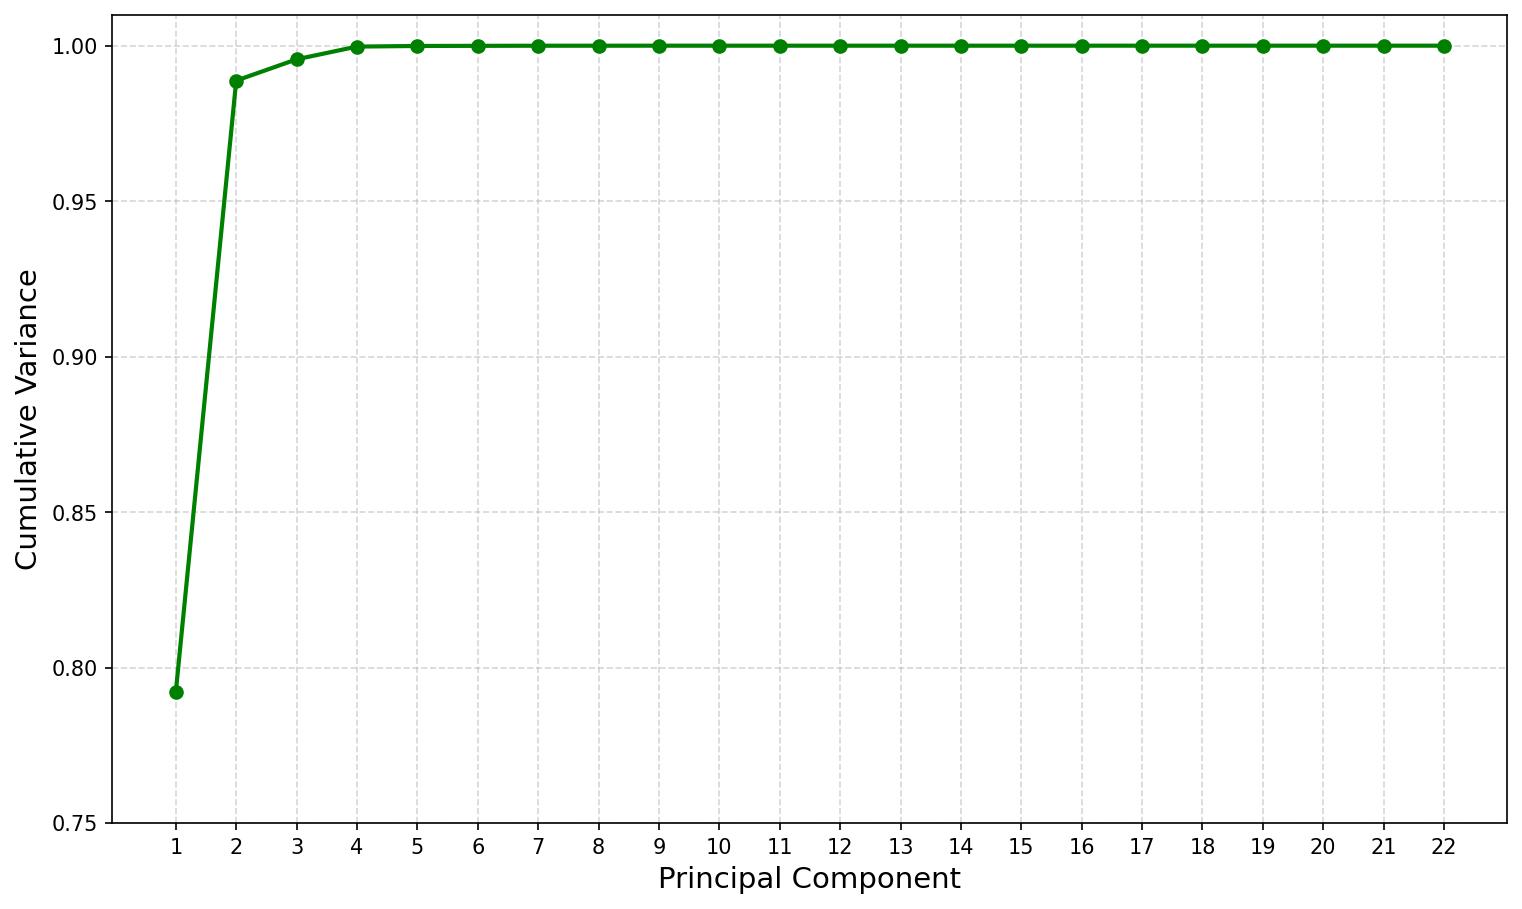

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7), dpi=150)   # Improving resolution

plt.plot(
    range(1, len(cumulative_variance)+1),
    cumulative_variance,
    marker='o',
    markersize=6,
    linewidth=2,
    color='green'
)

plt.title("", fontsize=16)
plt.xlabel("Principal Component", fontsize=14)
plt.ylabel("Cumulative Variance", fontsize=14)

# Focusing between 0.75 and 1.01
plt.ylim(0.75, 1.01) 

plt.xticks(range(1, len(cumulative_variance)+1))
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Principal Component Analysis

for each train, validation, and test, we used this method

before running the PCA, cut taxi_time column, execute PCA, then add it back in

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
A = pd.read_csv("train_raw_gA.csv").values

In [19]:
# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(A)

# access values and vectors
print("Eigenvectors:")
print(pca.components_)
print("Eigenvalues:")
print(pca.explained_variance_)

Eigenvectors:
[[ 1.30014208e-04  2.51080591e-03 -9.92767582e-04 -9.24690168e-04
   3.02228113e-04  6.29963838e-01  8.75704237e-02  6.29304901e-01
   1.89255768e-03  3.47220683e-01  2.80850598e-01  1.36520181e-04
   3.67634015e-07  6.94068628e-04  5.46172520e-04  2.69630526e-04
  -1.87949672e-05  7.57156239e-06  4.30500544e-04  2.53004318e-04
  -2.06025809e-04 -2.57193648e-04]
 [-3.23066345e-04 -1.57845781e-03  9.82980697e-04  8.87950417e-04
  -7.97812748e-04  6.00672032e-02  1.21140623e-01 -2.61765190e-02
   1.40234973e-02 -6.76894881e-01  7.22938586e-01  6.75895613e-06
   3.22754303e-06 -7.77035202e-04 -6.83612679e-04 -4.56632529e-04
   2.51900284e-04  2.79856749e-04 -8.37043809e-04 -6.17672002e-04
   4.79223679e-04  6.42345815e-04]]
Eigenvalues:
[1470873.38520871  359197.18292926]


In [ ]:
B = pca.transform(A)
plt.scatter(B[:,0], B[:,1])

In [ ]:
print("Eigenvectors:")
print(pca.components_)
print("Eigenvalues:")
print(pca.explained_variance_)

In [ ]:
df_pca = pd.DataFrame(B, columns=["PC1", "PC2"])
df_pca.head()

In [ ]:
df_pca.to_csv("train_reduced_gA.csv", index=False)
print("Saved train_reduced_gA.csv")